<a href="https://colab.research.google.com/github/blortle-dev/data-science-lasa/blob/main/Unit%207/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Using polynomials to create models allows you to acheive models with more detail and better fits than simpler liner or logarithmic models.
One example of this is in my Unit 5 project, where I used a polynomial element in my model (from this unit!) to achieve a better fit:
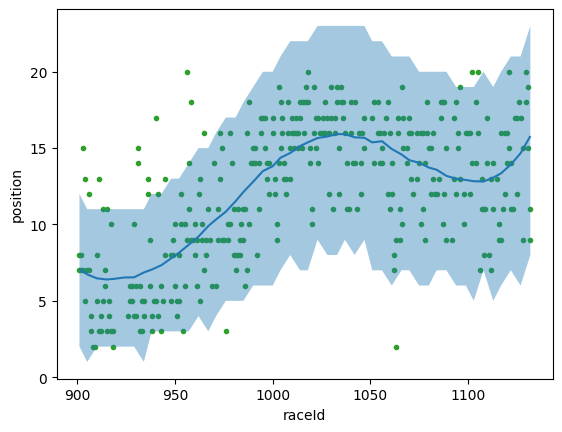

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

You shouldn't include a polynomial element in models that don't have a trend matching a polynomial. For example, if your data looks pretty linear, you shouldn't use a polynomial elemnt as it creates unnecessary complexity and could even make the model less accurate.

**Task3**:

What's the point of using b splines?

B splines are useful to help your model better fit your data.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process is a way to create a model using data that follows an unknown function, or if you don't know what your data looks like.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a distributional model


In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-albs2b40
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-albs2b40
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=4bd54f056e6e64b1d2c042f4ea2060648c010a256659297387932625043f1332
  Stored in directory: /tmp/pip-ephem-wheel-cache-4d6dngxc/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.3 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [3]:
# Not sure which params to model, so I'm gonna pick (sorry if i missed something)

url = "https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv"
data = pd.read_csv(url)

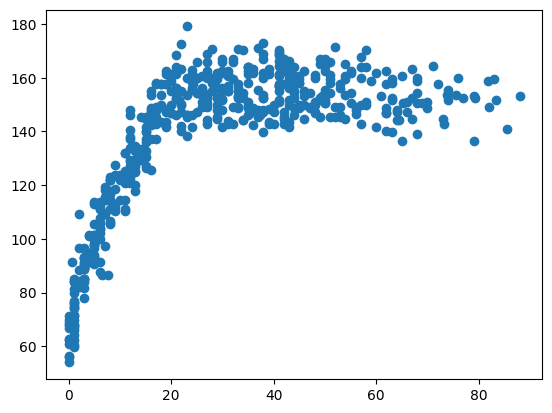

In [4]:
# scatter plot!

plt.scatter(data['age'],data['height'])

In [21]:
model_poly_7_t = bmb.Model("height ~ poly(age, degree=6)", data, family="negativebinomial")
# 6th degree seems to not have the issue of falling off (like 4th) or rising up (like 5th) at the end. Doesn't seem to overfit either.
idata_poly_7_t = model_poly_7_t.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


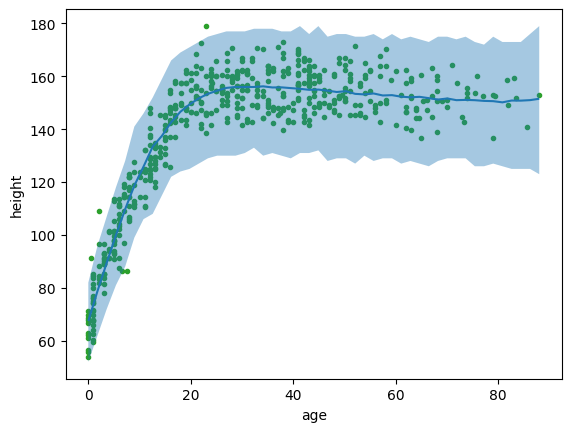

In [22]:
bmb.interpret.plot_predictions(model_poly_7_t, idata_poly_7_t, "age", pps=True)
plt.plot(data.age, data.height, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

Changing the mean of the GP can significantly change the output (depending on your data)

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

This is my favorite graph:
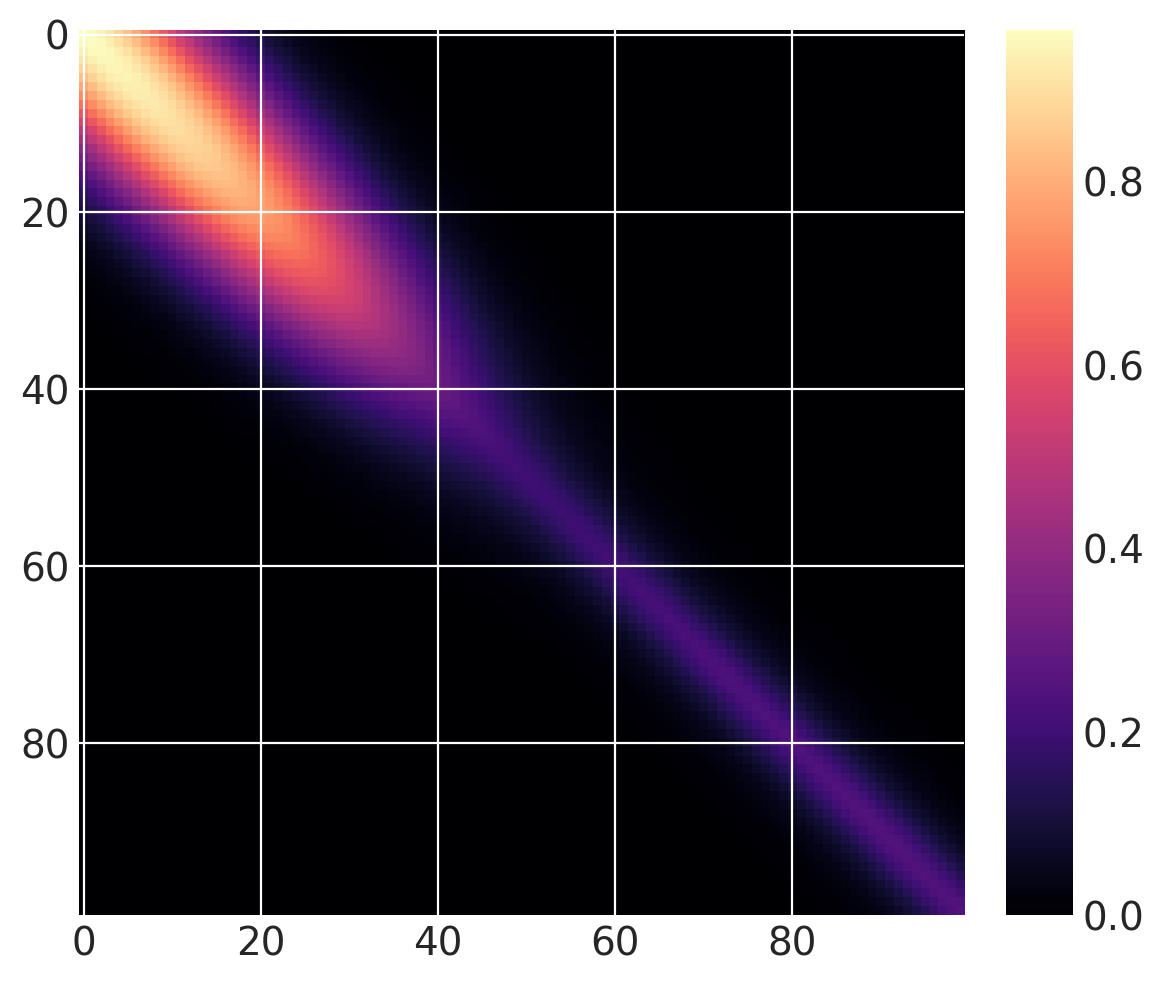
Why? It looks cool.